# Homework 3 - Master's Degrees from all over!
---

## IMPORTING LIBRARIES 
---

## [1] Recommendation sytem
---

### [1.2] Minhash Signatures

### [1.3] Locality-Sensitive Hashing (LSH)

## [2] Grouping Users together!
---

### [2.1] Getting your data + feature engineering

### [2.2] Choose your features (variables)!

### [2.3] Clustering!

### [2.4] Analysing your results!

# [3] Bonus Question
---

I ask to chatGPT which are the three algorithms for Density-Based Clustering, it suggest to me:

- **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise): DBSCAN is a density-based clustering non-parametric algorithm. It groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions1.

- **OPTICS** (Ordering Points To Identify the Clustering Structure): OPTICS is an algorithm for finding density-based clusters in spatial data. It’s similar to DBSCAN, but it addresses one of DBSCAN’s major weaknesses: the problem of detecting meaningful clusters in data of varying density2.

- **Mean Shift Clustering**: Mean shift is a non-parametric feature-space analysis technique for locating the maxima of a density function, a so-called mode-seeking algorithm. It is particularly useful for datasets where the clusters have arbitrary shapes and are not well-separated by linear boundaries3.

I'm starting thinking that the **DBSCAN** is the best choose, because it not require to specify the number of clusters in the data a priori, It can even find a cluster completely surrounded by (but not connected to) a different cluster and the parameters required can be set by a domain expert, if the data is well understood, but given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions.
Instead, **OPTICS** is similar to the previous, but it addresses the problem of detecting meaningful clusters in data of varying density; to do so, the points of the database are (linearly) ordered such that spatially closest points become neighbors in the ordering. Additionally, a special distance is stored for each point that represents the density that must be accepted for a cluster so that both points belong to the same cluster. This is represented as a dendrogram.
So i think that the last algorithm can explain and rappresent better our data.

In [1]:
import pandas as pd
df = pd.read_csv('vodclickstream_uk_movies_03.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671736 entries, 0 to 671735
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    671736 non-null  int64  
 1   datetime      671736 non-null  object 
 2   duration      671736 non-null  float64
 3   title         671736 non-null  object 
 4   genres        671736 non-null  object 
 5   release_date  671736 non-null  object 
 6   movie_id      671736 non-null  object 
 7   user_id       671736 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 41.0+ MB


We decide to use sklearn library that consider that OPTICS is related to DBSCAN so this algorithm keeps cluster hierarchy for a variable neighborhood radius. Clusters are then extracted using a DBSCAN-like method (cluster_method = ‘dbscan’) or an automatic technique(cluster_method = ‘xi’).

This implementation deviates from the original OPTICS by first performing k-nearest-neighborhood searches on all points to identify core sizes, then computing only the distances to unprocessed points when constructing the cluster order. Note that we do not employ a heap to manage the expansion candidates, so the time complexity will be O(n^2).

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler

In [9]:
df.datetime = pd.to_datetime(df.datetime)
df.release_date = pd.to_datetime(df.release_date, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671736 entries, 0 to 671735
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    671736 non-null  int64         
 1   datetime      671736 non-null  datetime64[ns]
 2   duration      671736 non-null  float64       
 3   title         671736 non-null  object        
 4   genres        671736 non-null  object        
 5   release_date  641432 non-null  datetime64[ns]
 6   movie_id      671736 non-null  object        
 7   user_id       671736 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 41.0+ MB


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
 

# [4] Command Line Question
---

In this question, we used command line tools on Linux operating system to answer the following questions using the same dataset that we have been using so far:

* What is the most-watched Netflix title?
* Report the average time between subsequent clicks on Netflix.com
* Provide the ID of the user that has spent the most time on Netflix

**LOOK THE CODE IN THE SCRIPT FILE COMMANDLINE.SH**

**Output**

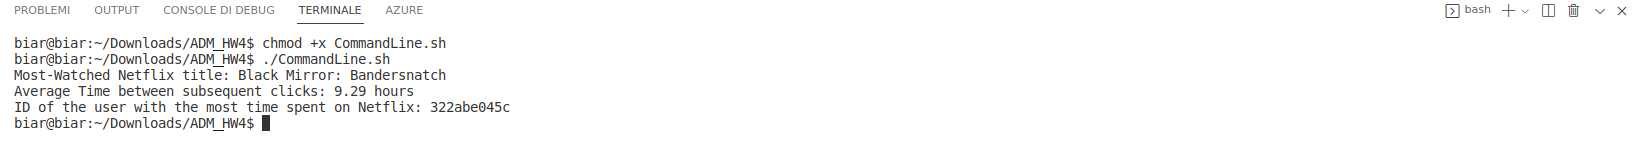

# [4] Algorithmic Question
---

Federico studies in a demanding university where he has to take a certain number $N$ of exams to graduate, but he is free to choose in which order he will take these exams. Federico is panicking since this university is not only one of the toughest in the world but also one of the weirdest. His final grade won't depend at all on the mark he gets in these courses: there's a precise evaluation system.

He was given an initial personal score of $S$ when he enrolled, which changes every time he takes an exam: now comes the crazy part. He soon discovered that every of the $N$ exams he has to take is assigned a mark $p$. Once he has chosen an exam, his score becomes equal to the mark $p$, and at the same time, the scoring system changes:

If he takes an "easy" exam (the score of the exam being less than his score), every other exam's mark is increased by the quantity $S-p$.
If he takes a "hard" exam (the score of the exam is greater than his score), every other exam's mark is decreased by the quantity $p-S$.

In this chaotic university where the only real exam seems to be choosing the best way to take exams, you are the poor student advisor who is facing a long queue of confused people who need some help. Federico is next in line, and he comes up in turn with an inescapable question: he wants to know which is the highest score possible he could get.

a) Fortunately, you have a computer app designed by a brilliant student. Federico wants you to show him the code which this app is based on because he wants to do paid counseling for other desperate students: in a recursive fashion, the helped helps the helpable.

To find the highest score that can be achieved in this particular university, we have decided to create a recursive algorithm that performs the necessary operations to update the score at each iteration and then repeats them until it finds the maximum.

In [1]:
def highest_possible_score(score, marks):
    if not marks:  # If there are no exams left to take, return the current score
        return score

    max_score = 0  # Initialize max_score

    for i, exam_score in enumerate(marks):
        new_marks = marks[:i] + marks[i + 1:]  # Exclude the current exam score
        new_score = exam_score  # Federico's score after taking the exam

        # Determine the change in marks based on the exam difficulty
        if exam_score < score:  # If it's an "easy" exam
            new_marks = [mark + (score - exam_score) if mark + (score - exam_score)>=0 else 0 for mark in new_marks]
        elif exam_score > score:  # If it's a "hard" exam
            new_marks = [mark - (exam_score - score) if mark - (exam_score - score)>=0 else 0 for mark in new_marks]

        # Recursively calculate the highest possible score after taking this exam
        max_score = max(max_score, highest_possible_score(new_score, new_marks))

    return max_score

# Test cases
s1 = 8
p1 = [5, 7, 1]
result1 = highest_possible_score(s1, p1)
print("Output 1:", result1)

s2 = 25
p2 = [18, 24, 21, 32, 27]
result2 = highest_possible_score(s2, p2)
print("Output 2:", result2)

s3 = 30
p3 = [13, 27, 41, 59, 28, 33, 39, 19, 52, 48, 55, 79]
result3 = highest_possible_score(s3, p3)
print("Output 3:", result3)


Output 1: 11
Output 2: 44
Output 3: 109


### Computational complexity


b) Federico is getting angry because he claims that your code is slow! Show him formally with a big-O notation that he is as crazy as this university!



The complexity of my algorithm is $O(n! \cdot n^2)$.

The number of recursive calls equals the number of permutations of possible exams, which is n!, where n is the number of exams.
Each recursive call executes a for loop over all the remaining exams.
Within the loop, operations involve copying the list of exams (O(n)), comparisons (O(1)), and addition or subtraction operations on the elements of the list (O(n)).

Therefore:

- O(n!) arises from the number of permutations of possible exams.
- $O(n^2)$ arises from the operations within each recursive call.

Indeed, as n grows larger, the execution time increases. In the case of the third example where p has a length of 12, the algorithm takes approximately 8 minutes to run. When considering comparing all the exams in a study program, it might take far too long, especially considering that a three-year study program has around 25 exams.


### Optimization

c) If, unfortunately, Federico is right in the grip of madness, he will threaten you to optimize the code through a different approach. You should end this theater of the absurd by any means! (And again, formally prove that you improved time complexity)



I tried to optimize it by creating a tuple to store each unique combination of score and marks, to avoiding redundant operations and with memoization, the number of unique subproblems calculated reduces significantly.

In [2]:
def highest_possible_score(score, marks, memo={}):
    if not marks:
        return score

    if (score, tuple(marks)) in memo:  # If result is already calculated, return it
        return memo[(score, tuple(marks))]

    max_score = 0

    for i, exam_score in enumerate(marks):
        new_marks = marks[:i] + marks[i + 1:]

        if exam_score < score:
            new_marks = [mark + (score - exam_score) if mark + (score - exam_score)>=0 else 0 for mark in new_marks]
        elif exam_score > score:
            new_marks = [mark - (exam_score - score) if mark - (exam_score - score)>=0 else 0 for mark in new_marks]

        new_score = exam_score
        new_max_score = highest_possible_score(new_score, new_marks, memo)
        max_score = max(max_score, new_max_score)

    memo[(score, tuple(marks))] = max_score  # Store the calculated result in the memo

    return max_score

s1 = 8
p1 = [5, 7, 1]
result1 = highest_possible_score(s1, p1)
print("Output 1:", result1)

s2 = 25
p2 = [18, 24, 21, 32, 27]
result2 = highest_possible_score(s2, p2)
print("Output 2:", result2)

s3 = 30
p3 = [13, 27, 41, 59, 28, 33, 39, 19, 52, 48, 55, 79]
result3 = highest_possible_score(s3, p3)
print("Output 3:", result3)

Output 1: 11
Output 2: 44
Output 3: 109


The memoization effectively limits the number of unique subproblems to be solved to a maximum of the number of possible distinct combinations of score and marks.
The recursion in the worst case, for each exam, will consider two possibilities (easy or hard). So, if there are n exams, it would explore $2^n$ possibilities.

Considering these points, the time complexity of the memoized highest_possible_score function can be seen as improved from the naive exponential time complexity to something closer to $O(n \cdot s)$, where n is the number of exams and s is the range of possible score differences between exams.

It is evidently faster, in fact it take only 0.4 second to run.

### The optimization of chat GPT

d) Ask chatGPT for a third (optimized) implementation and analyze again its time complexity. Be careful (and crafty) in defining the prompt, and challenge the machine in this coding question!

I send to chat Gpt my last code and i ask it to optimize my code trying to reduce the computational complexity.  this is it output: 

In this code, I added a memo parameter to the highest_possible_score function that is used to store intermediate results. This memo dictionary is passed to each recursive call of the function, thus allowing it to store the results of each sub-problem. When the function is called with the same score and marks parameters, it simply returns the stored result instead of calculating it again.

In [3]:
def highest_possible_score(score, marks, memo=None):
    if memo is None:
        memo = {}

    if not marks:
        return score

    if (score, tuple(marks)) in memo:  # If result is already calculated, return it
        return memo[(score, tuple(marks))]

    max_score = 0

    for i, exam_score in enumerate(marks):
        new_marks = marks[:i] + marks[i + 1:]

        if exam_score < score:
            new_marks = [mark + (score - exam_score)  if mark + (score - exam_score)>=0 else 0  for mark in new_marks]
        elif exam_score > score:
            new_marks = [mark - (exam_score - score) if mark - (exam_score - score)>=0 else 0 for mark in new_marks]

        new_score = exam_score
        new_max_score = highest_possible_score(new_score, new_marks, memo)
        max_score = max(max_score, new_max_score)

    memo[(score, tuple(marks))] = max_score  # Store the calculated result in the memo

    return max_score

s1 = 8
p1 = [5, 7, 1]
result1 = highest_possible_score(s1, p1)
print("Output 1:", result1)

s2 = 25
p2 = [18, 24, 21, 32, 27]
result2 = highest_possible_score(s2, p2)
print("Output 2:", result2)

s3 = 30
p3 = [13, 27, 41, 59, 28, 33, 39, 19, 52, 48, 55, 79]
result3 = highest_possible_score(s3, p3)
print("Output 3:", result3)


Output 1: 11
Output 2: 44
Output 3: 109


This version of the function is better in terms of optimization. The reason is that it initializes the memo dictionary inside the function. This means that a new memo dictionary is created every time the function is called, which prevents the dictionary from growing indefinitely and using up all the available memory.

In the first version of the function, the memo dictionary is initialized in the function’s parameter list. This means that the same memo dictionary is used for all calls to the function, even across different top-level calls. This can cause the dictionary to grow very large if the function is called many times, which can lead to high memory usage.

So, in terms of memory optimization, the second version of the function is better. However, in terms of time complexity, both versions of the function have the same time complexity of $O(n^2 \cdot m)$, where n is the number of elements in the marks list and m is the maximum value in the marks list. This is because the core logic of the function is the same in both versions.

